# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Comparison between grid search and successive halving

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [4]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from pylab import rcParams

<div class="alert alert-info">
<font color=black>

- We first define the parameter space for an SVC estimator, and compute the time required to train a HalvingGridSearchCV instance, as well as a GridSearchCV instance.

</font>
</div>

In [2]:
rng = np.random.RandomState(0)
X, y = datasets.make_classification(n_samples=1000, random_state=rng)

gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {'gamma': gammas, 'C': Cs}

clf = SVC(random_state=rng)

tic = time()
gsh = HalvingGridSearchCV(estimator=clf, param_grid=param_grid, factor=2,
                          random_state=rng)
gsh.fit(X, y)
gsh_time = time() - tic

tic = time()
gs = GridSearchCV(estimator=clf, param_grid=param_grid)
gs.fit(X, y)
gs_time = time() - tic

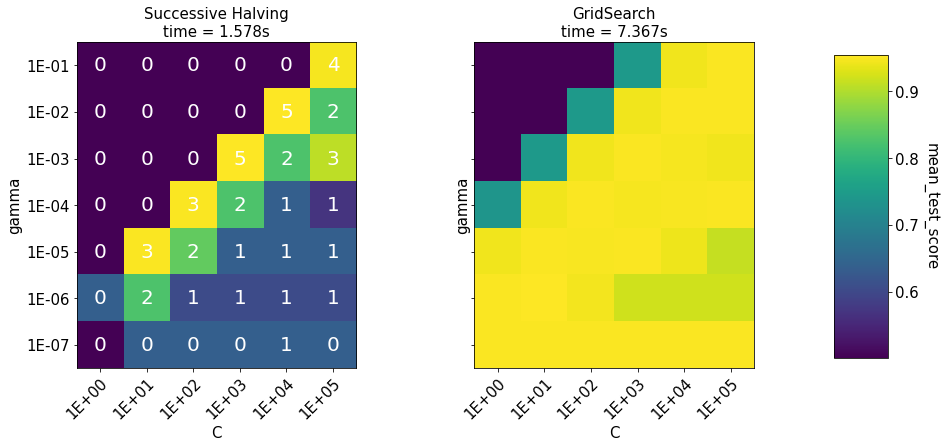

In [7]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False):
    """Helper to make a heatmap."""
    results = pd.DataFrame.from_dict(gs.cv_results_)
    results['params_str'] = results.params.apply(str)
    if is_sh:
        # SH dataframe: get mean_test_score values for the highest iter
        scores_matrix = results.sort_values('iter').pivot_table(
                index='param_gamma', columns='param_C',
                values='mean_test_score', aggfunc='last'
        )
    else:
        scores_matrix = results.pivot(index='param_gamma', columns='param_C',
                                      values='mean_test_score')

    im = ax.imshow(scores_matrix)

    ax.set_xticks(np.arange(len(Cs)))
    ax.set_xticklabels(['{:.0E}'.format(x) for x in Cs])
    ax.set_xlabel('C', fontsize=15)

    ax.set_yticks(np.arange(len(gammas)))
    ax.set_yticklabels(['{:.0E}'.format(x) for x in gammas])
    ax.set_ylabel('gamma', fontsize=15)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    if is_sh:
        iterations = results.pivot_table(index='param_gamma',
                                         columns='param_C', values='iter',
                                         aggfunc='max').values
        for i in range(len(gammas)):
            for j in range(len(Cs)):
                ax.text(j, i, iterations[i, j],
                        ha="center", va="center", color="w", fontsize=20)

    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('mean_test_score', rotation=-90, va="bottom",
                           fontsize=15)

rcParams['font.size'] = 15
rcParams['figure.figsize'] = 15, 6

fig, axes = plt.subplots(ncols=2, sharey=True)
ax1, ax2 = axes

make_heatmap(ax1, gsh, is_sh=True)
make_heatmap(ax2, gs, make_cbar=True)

ax1.set_title('Successive Halving\ntime = {:.3f}s'.format(gsh_time),
              fontsize=15)
ax2.set_title('GridSearch\ntime = {:.3f}s'.format(gs_time), fontsize=15)
plt.show()

<div class="alert alert-info">
<font color=black>

- The heatmaps show the mean test score of the parameter combinations for an SVC instance. 
- The HalvingGridSearchCV also shows the iteration at which the combinations where last used. 
- The combinations marked as 0 were only evaluated at the first iteration, while the ones with 5 are the parameter combinations that are considered the best ones.
- THE BOTTOM LINE: We can see that the HalvingGridSearchCV class is able to find parameter combinations that are just as accurate as GridSearchCV, in much less time.

</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_heatmap.html#sphx-glr-auto-examples-model-selection-plot-successive-halving-heatmap-py

</font>
</div>